In [1]:
import pandas as pd
import numpy as np
import sklearn as sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE

from sklearn import svm
from sklearn import metrics #Import for accuracy calculation
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [2]:
features = ['acousticness',  'energy', 'instrumentalness', 'loudness',
            'speechiness','tempo'] # 'valence', 'danceability','liveness'

def doPCA(df, features):
    pca = PCA(n_components = 3)
    X = pca.fit_transform(df[features])
    print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

    X_reduced = pd.DataFrame(X)
    X_reduced['year_bins'] = df['year_bins']
    X_reduced['popularity_cut'] = df['popularity_cut']
    X_reduced['popularity_qcut'] = df['popularity_qcut']
    print(X_reduced.head())
    
    X_new = pca.inverse_transform(X)
    X_new = pd.DataFrame(X_new, columns=features)
    X_new['year_bins'] = df['year_bins']
    X_new['popularity_cut'] = df['popularity_cut']
    X_new['popularity_qcut'] = df['popularity_qcut']
    return X_reduced, X_new



# SVM Multiclassification

We are trying different kernels and c values to find the best performing model for popularity_cut, popularity_qcut and year_bins

### SVM : popularity_cut

In [3]:
df = pd.read_csv('~/Box/DSCI303/archive/final_data_17k.csv')#.truncate(after=10000)
df_test = pd.read_csv('~/Box/DSCI303/archive/final_popularity_cut_test_17k.csv')
df_train = pd.read_csv('~/Box/DSCI303/archive/final_popularity_cut_train_17k.csv')
# df_train.info()

========= Starting SVM for target variable: popularity_cut ==========
Best score for training data: 0.6442355283950201 

Best C: 10 

Best Kernel: rbf 

Best Gamma: scale 



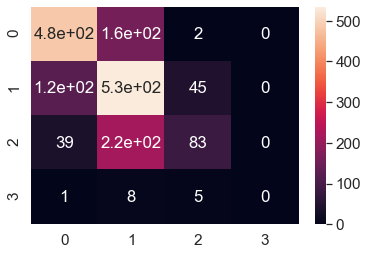

/Users/diksha/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.75      0.75      0.75       645
           1       0.58      0.76      0.66       702
           2       0.61      0.24      0.35       339
           3       0.00      0.00      0.00        14

    accuracy                           0.65      1700
   macro avg       0.49      0.44      0.44      1700
weighted avg       0.65      0.65      0.63      1700

Training set score for SVM: 0.654830
Testing  set score for SVM: 0.647647


In [4]:
features = ['acousticness', 'energy', 'instrumentalness', 'loudness','speechiness','tempo']
print('========= Starting SVM for target variable: popularity_cut ==========')

# X_reduced, df_test = doPCA(df_test, features)
# X_reduced, df_train = doPCA(df_train, features)

X_train = df_train[features]
y_train = df_train['popularity_cut']
X_test = df_test[features]
y_test = df_test['popularity_cut']


# params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
#                 {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
params_grid = {'kernel':('linear', 'rbf'), 'C':[10,50]} #do three only

svm_model = GridSearchCV(svm.SVC(), params_grid, cv=5)
svm_model.fit(X_train, y_train)
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n")

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n")
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
y_pred = final_model.predict(X_test)


# Making the Confusion Matrix
df_cm = metrics.confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True)
plt.show()

print(classification_report(y_test,y_pred))
print("Training set score for SVM: %f" % final_model.score(X_train , y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test  , y_test ))

### SVM for popularity_qcut

========= Starting SVM for target variable: popularity_qcut ==========
Best score for training data: 0.5279580715943755 

Best C: 10 

Best Kernel: rbf 

Best Gamma: scale 



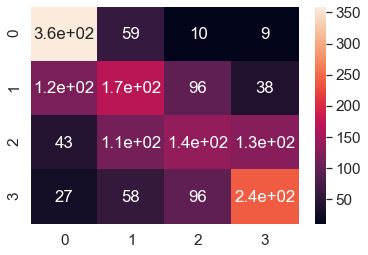

              precision    recall  f1-score   support

           0       0.66      0.82      0.73       437
           1       0.42      0.40      0.41       421
           2       0.41      0.33      0.36       422
           3       0.58      0.57      0.57       420

    accuracy                           0.53      1700
   macro avg       0.52      0.53      0.52      1700
weighted avg       0.52      0.53      0.52      1700

Training set score for SVM: 0.548231
Testing  set score for SVM: 0.532353


In [5]:
df = pd.read_csv('~/Box/DSCI303/archive/final_data_17k.csv')#.truncate(after=10000)
df_test = pd.read_csv('~/Box/DSCI303/archive/final_popularity_qcut_test_17k.csv')
df_train = pd.read_csv('~/Box/DSCI303/archive/final_popularity_qcut_train_17k.csv')

features = ['acousticness', 'energy', 'instrumentalness', 'loudness','speechiness','tempo']
print('========= Starting SVM for target variable: popularity_qcut ==========')

# X_reduced, df_test = doPCA(df_test, features)
# X_reduced, df_train = doPCA(df_train, features)

X_train = df_train[features]
y_train = df_train['popularity_qcut']
X_test = df_test[features]
y_test = df_test['popularity_qcut']


# params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
#                 {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
params_grid = {'kernel':('linear', 'rbf'), 'C':[10, 50]} #do three only

svm_model = GridSearchCV(svm.SVC(), params_grid, cv=5)
svm_model.fit(X_train, y_train)
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n")

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n")
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
y_pred = final_model.predict(X_test)


# Making the Confusion Matrix
df_cm = metrics.confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True)
plt.show()

print(classification_report(y_test,y_pred))
print("Training set score for SVM: %f" % final_model.score(X_train , y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test  , y_test ))

### SVM for year_bins

========= Starting SVM for target variable: year_bins ==========
Best score for training data: 0.6153291993882679 

Best C: 50 

Best Kernel: rbf 

Best Gamma: scale 



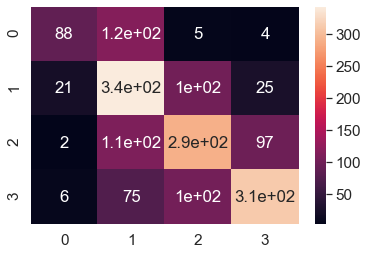

              precision    recall  f1-score   support

           0       0.75      0.41      0.53       213
           1       0.53      0.70      0.60       490
           2       0.58      0.58      0.58       501
           3       0.71      0.63      0.67       496

    accuracy                           0.61      1700
   macro avg       0.65      0.58      0.60      1700
weighted avg       0.63      0.61      0.61      1700

Training set score for SVM: 0.643581
Testing  set score for SVM: 0.608824


In [9]:
df = pd.read_csv('~/Box/DSCI303/archive/final_data_17k.csv')#.truncate(after=10000)
df_test = pd.read_csv('~/Box/DSCI303/archive/final_year_test_17k.csv')
df_train = pd.read_csv('~/Box/DSCI303/archive/final_year_train_17k.csv')

features = ['acousticness', 'energy', 'instrumentalness', 'loudness','speechiness','tempo']
print('========= Starting SVM for target variable: year_bins ==========')

# X_reduced, df_test = doPCA(df_test, features)
# X_reduced, df_train = doPCA(df_train, features)

X_train = df_train[features]
y_train = df_train['year_bins']
X_test = df_test[features]
y_test = df_test['year_bins']


# params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
#                 {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
params_grid = {'kernel':('linear', 'rbf'), 'C':[10, 50]} #do three only

svm_model = GridSearchCV(svm.SVC(), params_grid, cv=5)
svm_model.fit(X_train, y_train)
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n")

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n")
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
y_pred = final_model.predict(X_test)


# Making the Confusion Matrix
df_cm = metrics.confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True)
plt.show()

print(classification_report(y_test,y_pred))
print("Training set score for SVM: %f" % final_model.score(X_train , y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test  , y_test ))

# SVM - full dataset. 

We are now testing performance of the best model choosen above on full dataset as well. 


### SVM - popularity_cut

In [6]:
df = pd.read_csv('~/Box/DSCI303/archive/final_data.csv')
df_test = pd.read_csv('~/Box/DSCI303/archive/final_popularity_cut_test.csv')
df_train = pd.read_csv('~/Box/DSCI303/archive/final_popularity_cut_train.csv')

In [7]:
popularity_var='popularity_cut'
kernel='rbf'

afterPCA=False
if afterPCA:
    X_reduced, df_test = doPCA(df_test, features)
    X_reduced, df_train = doPCA(df_train, features)

X_train = df_train[features]
y_train = df_train[popularity_var]
X_test = df_test[features]
y_test = df_test[popularity_var]

#Create a svm Classifier
time_start = time.time()
clf = svm.SVC(kernel=kernel, C=10)
#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('SVM done! Time elapsed: {} seconds'.format(time.time()-time_start))

Accuracy: 0.644870813960332
SVM done! Time elapsed: 1593.9944849014282 seconds


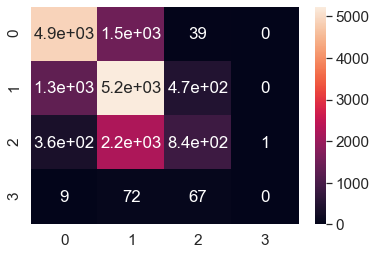

              precision    recall  f1-score   support

           0       0.75      0.76      0.75      6414
           1       0.58      0.75      0.65      6991
           2       0.59      0.24      0.35      3438
           3       0.00      0.00      0.00       148

    accuracy                           0.64     16991
   macro avg       0.48      0.44      0.44     16991
weighted avg       0.64      0.64      0.62     16991



In [8]:
df_cm = metrics.confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True)

plt.show()

print(metrics.classification_report(y_test, y_pred))

### SVM - popularity_qcut

In [9]:
df = pd.read_csv('~/Box/DSCI303/archive/final_data.csv')
df_test = pd.read_csv('~/Box/DSCI303/archive/final_popularity_qcut_test.csv')
df_train = pd.read_csv('~/Box/DSCI303/archive/final_popularity_qcut_train.csv')

In [10]:
popularity_var='popularity_qcut'
kernel='rbf'

afterPCA=False
if afterPCA:
    X_reduced, df_test = doPCA(df_test, features)
    X_reduced, df_train = doPCA(df_train, features)

X_train = df_train[features]
y_train = df_train[popularity_var]
X_test = df_test[features]
y_test = df_test[popularity_var]

#Create a svm Classifier
time_start = time.time()
clf = svm.SVC(kernel=kernel, C=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('SVM done! Time elapsed: {} seconds'.format(time.time()-time_start))

Accuracy: 0.536695897828262
SVM done! Time elapsed: 1151.0321049690247 seconds


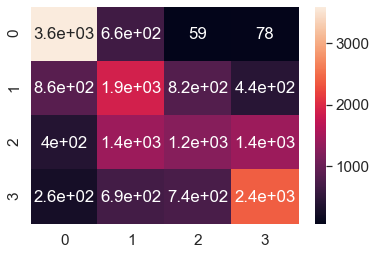

              precision    recall  f1-score   support

           0       0.70      0.82      0.76      4383
           1       0.41      0.47      0.44      4014
           2       0.44      0.28      0.34      4513
           3       0.55      0.59      0.57      4081

    accuracy                           0.54     16991
   macro avg       0.52      0.54      0.52     16991
weighted avg       0.52      0.54      0.52     16991



In [11]:
df_cm = metrics.confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True)
plt.show()
print(metrics.classification_report(y_test, y_pred))

### SVM - year_bins

In [10]:
df = pd.read_csv('~/Box/DSCI303/archive/final_data.csv')
df_test = pd.read_csv('~/Box/DSCI303/archive/final_year_test.csv')
df_train = pd.read_csv('~/Box/DSCI303/archive/final_year_train.csv')

In [11]:
popularity_var='year_bins'
kernel='rbf'

afterPCA=False
if afterPCA:
    X_reduced, df_test = doPCA(df_test, features)
    X_reduced, df_train = doPCA(df_train, features)

X_train = df_train[features]
y_train = df_train[popularity_var]
X_test = df_test[features]
y_test = df_test[popularity_var]

#Create a svm Classifier
time_start = time.time()
clf = svm.SVC(kernel=kernel, C=50)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('SVM done! Time elapsed: {} seconds'.format(time.time()-time_start))

Accuracy: 0.6316285092107586
SVM done! Time elapsed: 2621.778156042099 seconds


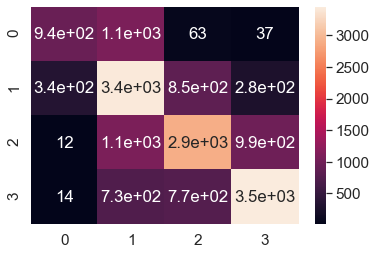

              precision    recall  f1-score   support

           0       0.72      0.44      0.55      2135
           1       0.54      0.70      0.61      4890
           2       0.63      0.58      0.61      5000
           3       0.73      0.70      0.71      4966

    accuracy                           0.63     16991
   macro avg       0.66      0.60      0.62     16991
weighted avg       0.65      0.63      0.63     16991



In [12]:
df_cm = metrics.confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True)
plt.show()
print(metrics.classification_report(y_test, y_pred))